In [44]:
import numpy as np
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### PARAMS ###
width = 6000 # 6km
R = 509


def get_network(num_nodes):
    positions = []
    for i in range(num_nodes):
        x = (random.random() - 0.5) * width
        y = (random.random() - 0.5) * width
        positions.append((x,y))

    pos_dict = {i: positions[i] for i in range(len(positions))}

    G = nx.random_geometric_graph(num_nodes, R, pos=pos_dict)
    return G



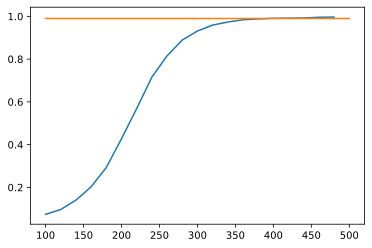

In [45]:
nn = range(100, 500, 20)
n_runs = 100

avg_diss_rate = []

for n in nn:
    diss_rate = []
    for r in range(n_runs):
        random.seed(r)
        G = get_network(n)
        gcc = nx.connected_components(G)
        gcc_sizes = np.array([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
        avg_diss_rate_exp = np.sum(np.power(gcc_sizes / n,2))
        diss_rate.append(avg_diss_rate_exp)
    avg_diss_rate.append(np.mean(diss_rate))
    

plt.plot(nn, avg_diss_rate)
plt.plot([100, 500],[0.99,0.99])
plt.show()